# Applying Gaussian Blur to Training Dataset

Perform Convolution with a Custom Guassian Kernel using FFT.

####  This is faster for large kernels. Both, raster band(s) and kernel are transformed into the frequency domain with fast fourier transform (FFT), the results are multiplied and the product is converted back using FFT.

#### Import packages for Gaussian Blur Application

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import os

#### Autocorrelation of white noise is an impulse

In [6]:
rng = np.random.default_rng()
sig = rng.standard_normal(1000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

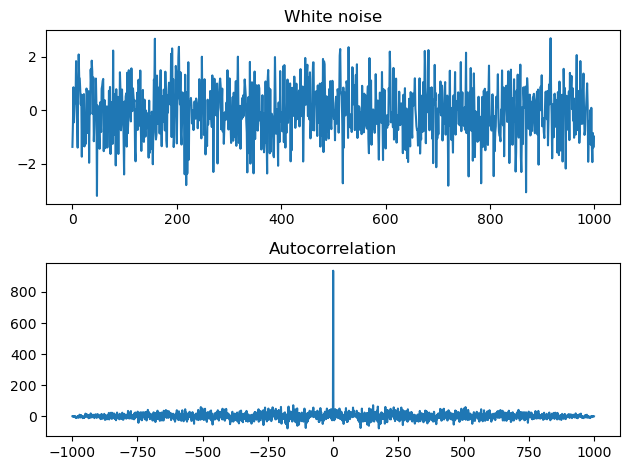

In [7]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()
plt.show()

#### Load Test Image

In [12]:
# Load the image
image_path = r"C:\Users\sneha\OneDrive\Documents\high quality satellite images\1.tif"
image = Image.open(image_path)
image_np = np.array(image)

#### Create The First Gaussian Kernel Setting

In [15]:
# Gaussian kernel setting #1
kernel1 = np.outer(signal.windows.gaussian(70, 4),
                  signal.windows.gaussian(100, 4))

# signal.windows.gaussian(70, 4): Creates a 1D Gaussian window with a size of 70 and standard deviation of 4.
# np.outer(): Computes the outer product of two vectors to create a 2D Gaussian kernel.

# Normalize the kernel
kernel1 /= np.sum(kernel1)

In [17]:
# Function to perform convolution on each channel
def convolve_channel(channel, kernel1):
    return signal.fftconvolve(channel, kernel1, mode='same')

# Apply convolution to each color channel and stack the channels back together
blurred_channels = [convolve_channel(image_np[:,:,i], kernel1) for i in range(3)]
blurred_image = np.stack(blurred_channels, axis=-1)

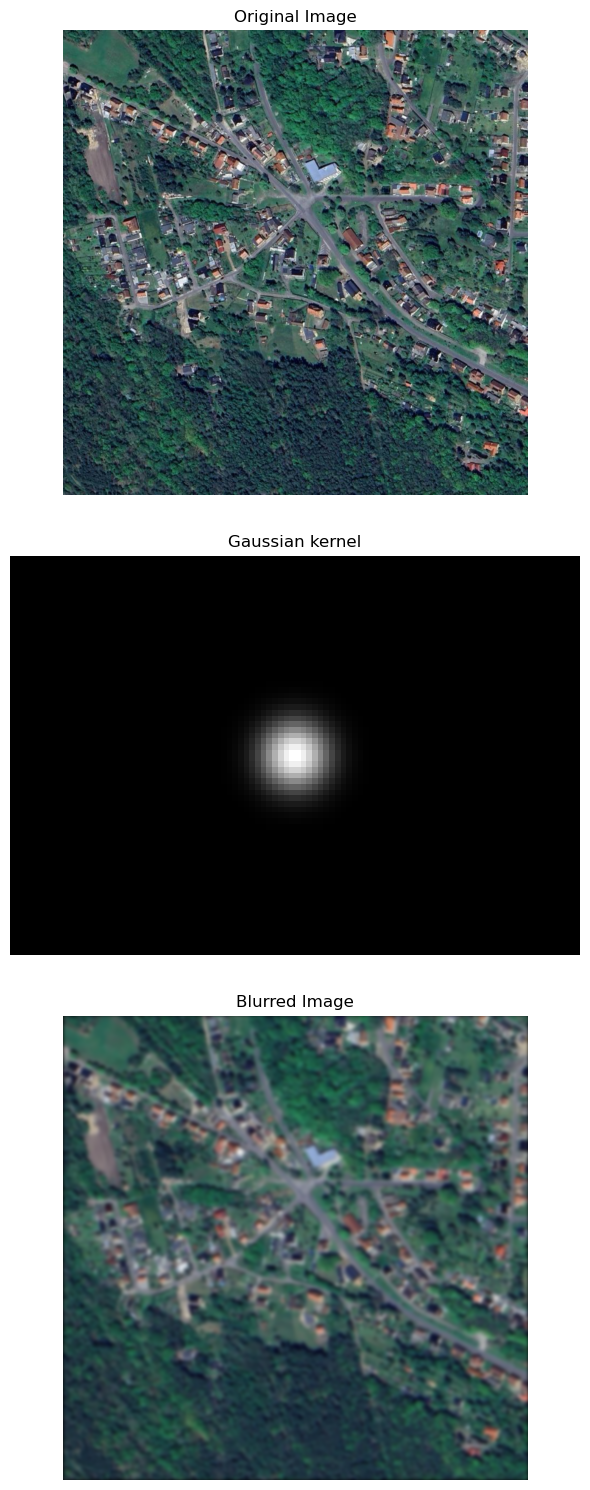

In [19]:
# Create plots
fig, (ax_orig, ax_kernel1, ax_blurred) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(image_np)
ax_orig.set_title('Original Image')
ax_orig.set_axis_off()
ax_kernel1.imshow(kernel1, cmap='gray')
ax_kernel1.set_title('Gaussian kernel')
ax_kernel1.set_axis_off()
ax_blurred.imshow(blurred_image.astype(np.uint8))  # Convert to uint8 for display
ax_blurred.set_title('Blurred Image')
ax_blurred.set_axis_off()
fig.tight_layout()
plt.show()

In [19]:
# Convert the blurred image back to an Image object
blurred_image_pil = Image.fromarray(blurred_image.astype(np.uint8))

# Save the blurred image
blurred_image_pil.save(r"C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\1.tif")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sneha\\OneDrive\\Documents\\blurred images kernel setting 1\\1.tif'

#### Create the Second Gaussian Kernel Setting

In [27]:
# Gaussian kernel setting #2
kernel2 = np.outer(signal.windows.gaussian(100, 10),
                  signal.windows.gaussian(100, 10))

# signal.windows.gaussian(100, 8): Creates a 1D Gaussian window with a size of 100 and standard deviation of 8.
# np.outer(): Computes the outer product of two vectors to create a 2D Gaussian kernel.

# Normalize the kernel
kernel2 /= np.sum(kernel2)

In [29]:
# Function to perform convolution on each channel
def convolve_channel(channel, kernel2):
    return signal.fftconvolve(channel, kernel2, mode='same')

# Apply convolution to each color channel and stack the channels back together
blurred_channels = [convolve_channel(image_np[:,:,i], kernel2) for i in range(3)]
blurred_image = np.stack(blurred_channels, axis=-1)

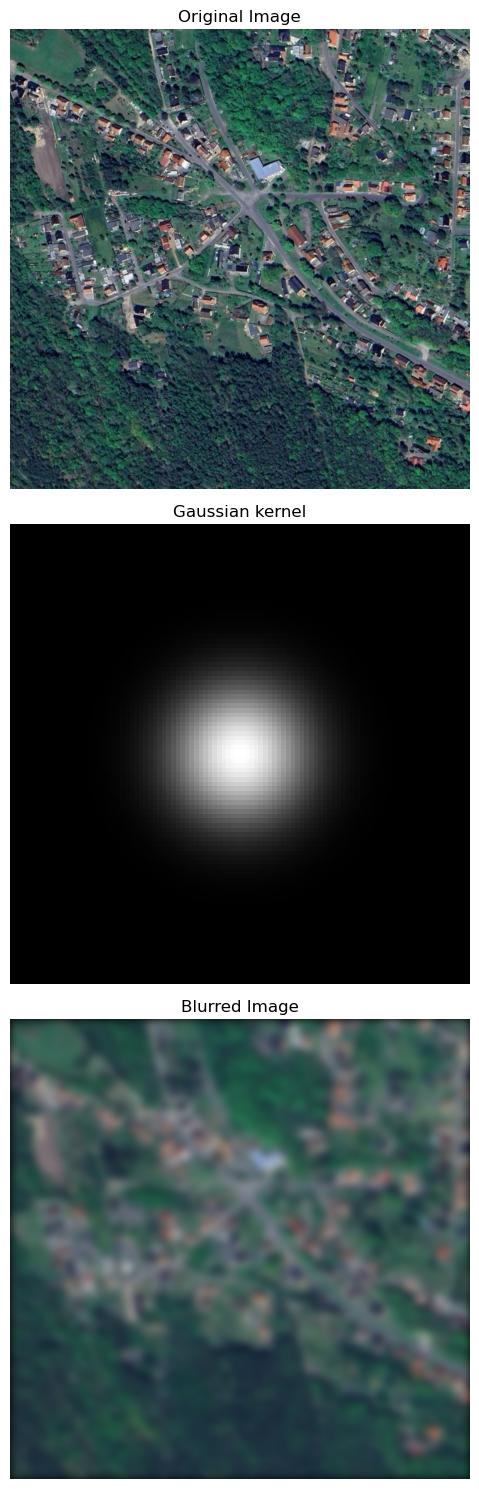

In [31]:
# Create plots
fig, (ax_orig, ax_kernel2, ax_blurred) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(image_np)
ax_orig.set_title('Original Image')
ax_orig.set_axis_off()
ax_kernel2.imshow(kernel2, cmap='gray')
ax_kernel2.set_title('Gaussian kernel')
ax_kernel2.set_axis_off()
ax_blurred.imshow(blurred_image.astype(np.uint8))  # Convert to uint8 for display
ax_blurred.set_title('Blurred Image')
ax_blurred.set_axis_off()
fig.tight_layout()
plt.show()

#### Load & Process Multiple Images Using Kernel Setting 1

In [163]:
# Function to process multiple images from folder
def process_images(input_folder, output_folder, kernel1):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.tif', '.png')):
            image_path = os.path.join(input_folder, filename)
            image = Image.open(image_path)
            image_np = np.array(image)
            
            if image_np.ndim == 2:
                # Grayscale image
                blurred_image = convolve_channel(image_np, kernel1)
                blurred_image_pil = Image.fromarray(blurred_image.astype(np.uint8))
            else:
                # Color image
                blurred_channels = [convolve_channel(image_np[:,:,i], kernel1) for i in range(3)]
                blurred_image = np.stack(blurred_channels, axis=-1)
                blurred_image_pil = Image.fromarray(blurred_image.astype(np.uint8))
            
            output_path = os.path.join(output_folder, filename)
            blurred_image_pil.save(output_path)
            print(f'Saved blurred image: {output_path}')
            print("Batch processing complete!")

# Paths for input and output folders
input_folder = r"C:\Users\sneha\OneDrive\Documents\high quality satellite images"
output_folder = r"C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 1"

# Process and save images
process_images(input_folder, output_folder, kernel1)

Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\.0.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\1.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\10.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\100.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\101.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\102.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\103.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\104.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\105.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\blurred images kernel setting 1\106.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents

#### Load & Process Multiple Images Using Kernel Setting 2

In [33]:
# Function to process multiple images from folder
def process_images(input_folder, output_folder, kernel2):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(input_folder):
        if filename.endswith(('.tif', '.png')):
            image_path = os.path.join(input_folder, filename)
            image = Image.open(image_path)
            image_np = np.array(image)
            
            if image_np.ndim == 2:
                # Grayscale image
                blurred_image = convolve_channel(image_np, kernel2)
                blurred_image_pil = Image.fromarray(blurred_image.astype(np.uint8))
            else:
                # Color image
                blurred_channels = [convolve_channel(image_np[:,:,i], kernel2) for i in range(3)]
                blurred_image = np.stack(blurred_channels, axis=-1)
                blurred_image_pil = Image.fromarray(blurred_image.astype(np.uint8))
            
            output_path = os.path.join(output_folder, filename)
            blurred_image_pil.save(output_path)
            print(f'Saved blurred image: {output_path}')

# Paths for input and output folders
input_folder = r"C:\Users\sneha\OneDrive\Documents\high quality satellite images"
output_folder = r"C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2"

# Process and save images
process_images(input_folder, output_folder, kernel2)

Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\1.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\10.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\100.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\101.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\102.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\103.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\104.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\105.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2\106.png
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blu

#### Process Test Images using Kernel Setting 2

In [33]:
# Function to process multiple images from folder
def process_images(input_folder, output_folder, kernel2):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(input_folder):
        if filename.endswith(('.tif', '.png')):
            image_path = os.path.join(input_folder, filename)
            image = Image.open(image_path)
            image_np = np.array(image)
            
            if image_np.ndim == 2:
                # Grayscale image
                blurred_image = convolve_channel(image_np, kernel2)
                blurred_image_pil = Image.fromarray(blurred_image.astype(np.uint8))
            else:
                # Color image
                blurred_channels = [convolve_channel(image_np[:,:,i], kernel2) for i in range(3)]
                blurred_image = np.stack(blurred_channels, axis=-1)
                blurred_image_pil = Image.fromarray(blurred_image.astype(np.uint8))
            
            output_path = os.path.join(output_folder, filename)
            blurred_image_pil.save(output_path)
            print(f'Saved blurred image: {output_path}')

# Paths for input and output folders
input_folder = r"C:\Users\sneha\OneDrive\Documents\test high quality satellite images (.tif)"
output_folder = r"C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)"

# Process and save images
process_images(input_folder, output_folder, kernel2)

Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\1 a).tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\1 b).tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\1 c).tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\10.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\11.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\12.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\13.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gaussian blurred images kernel setting 2 (test images)\14.tif
Saved blurred image: C:\Users\sneha\OneDrive\Documents\gau